In [260]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig
import math

df = pd.read_csv("all-hands.dat")
print(df)

    296  509  305  481  329  465  350  443  365  417  ...  136.2  369  141  \
0   284  511  299  488  321  471  335  449  348  426  ...    127  369  131   
1   293  510  310  490  328  472  340  450  352  427  ...    126  375  130   
2   310  506  323  483  345  466  359  443  372  419  ...    143  375  148   
3   334  509  351  490  369  472  381  449  392  427  ...    160  377  165   
4   316  511  330  489  351  471  365  450  378  427  ...    143  380  149   
5   284  508  295  481  311  457  332  437  349  412  ...    119  370  126   
6   351  507  365  484  383  465  394  441  403  417  ...    174  383  179   
7   301  509  314  489  333  473  350  455  366  436  ...    136  370  141   
8   317  502  330  481  351  467  367  446  381  426  ...    141  365  146   
9   267  507  285  491  302  473  314  453  325  433  ...     97  380   98   
10  295  501  314  486  332  470  346  451  359  431  ...    133  349  132   
11  292  489  307  468  327  454  342  434  357  414  ...    130

(1a)

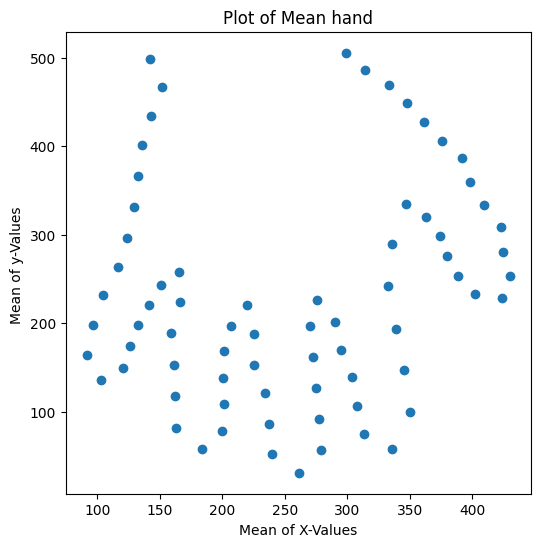

In [320]:
df_means = df.mean()




def plot_hand(meanss):
    X = []
    Y= []
    for index, value  in enumerate(meanss):
        if (index %2 ==0):  
            X.append(value)
        elif (index %2 ==1):
            Y.append(value)
    plt.figure(figsize=(6,6))
    plt.scatter(X,Y)
    plt.xlabel("Mean of X-Values")
    plt.ylabel("Mean of y-Values ")
    plt.title("Plot of Mean hand")
    plt.show()


plot_hand(df_means)
    

(1b) Calculating the Covariance Matrix

In [117]:
x_norm = df-df_means
n, d = df.shape
print(n,d)

def calculate_cov_matrix(n,xnorm):
    return ((np.transpose(xnorm)@ xnorm))/(n-1)
    

cov_matrix = calculate_cov_matrix(n,x_norm)
print(cov_matrix)

#Testing using NP functino
# print(np.cov(df,rowvar = False))


17 144
              296        509         305        481         329        465  \
296    582.808824  -3.775735  564.720588 -32.841912  572.338235 -36.680147   
509     -3.775735  32.257353   -3.768382  31.169118   -5.257353  24.488971   
305    564.720588  -3.768382  552.014706 -26.610294  558.518382 -28.566176   
481    -32.841912  31.169118  -26.610294  40.514706  -29.481618  38.746324   
329    572.338235  -5.257353  558.518382 -29.481618  568.007353 -29.301471   
...           ...        ...         ...        ...         ...        ...   
442     57.665441  52.095588   51.698529  38.198529   50.654412  18.669118   
153    584.522059  -1.283088  561.988971 -38.198529  571.220588 -45.481618   
477     50.191176  53.900735   43.029412  38.091912   42.599265  17.555147   
142.1  638.345588  -7.768382  615.827206 -43.672794  624.268382 -50.128676   
511     48.279412  53.893382   39.485294  35.547794   38.731618  13.128676   

              350        443         365        417  ...

(1c) 

In [104]:
# print(df)
x1_values = df.iloc[:,0] #1st column 
x2_values = df.iloc[:,2] #3rd column
x1_mean = x1_values.mean()
x2_mean= x2_values.mean()
x1_norm = x1_values-x1_mean
x2_norm = x2_values-x2_mean

def calc_cov(n,x1norm,x2norm):
    return (np.sum(x1norm@x2norm))/(n-1)



print("The Cov between X1 & X2 is:", calc_cov(n,x1_norm,x2_norm))

#cross validation using npfucniot top upper right and bottom left represent cov(a,b)
print("NP COV function:\n" , np.cov(x1_values,x2_values))


def calc_corr():
    return calc_cov(n,x1_norm,x2_norm)/(x1_values.std()*x2_values.std())

print("The correlation Between X1 & X2 is:" , calc_corr())



The Cov between X1 & X2 is: 564.7205882352941
NP COV function:
 [[582.80882353 564.72058824]
 [564.72058824 552.01470588]]
The correlation Between X1 & X2 is: 0.995623728078799


The correlation of .99 indicated that X1 and X2 have a strong positive correlation meaning that these poitns dispaly a strong linear relationship. Because the points are adjacent to each other, they have very similar have very similar behaviors which backups the extremely high correlation value because these poitns are nearly the same 

(1d) Calculating the PCA

In [307]:
#I realized a lot of this is unnescensarcy since np sorts eigenvalues in descignin order but included it just incases they were not
def calculate_PCA(cov_matrix, n):

    evalues, evectors = np.linalg.eig(cov_matrix)

    index = np.argsort(evalues)[::-1]


    evalues = evalues[index]
    evectors = evectors[:, index]

    evalues = evalues[:n]
    evectors = evectors[:,:n]

    return evalues, evectors

# Assuming cov_matrix is already defined and x_norm is your normalized data matrix
# Now let's calculate PCA for the first n principal components (e.g., n=144)
e_values, p_components = calculate_PCA(cov_matrix, 144)
# print(p_components)


(1e) Scree Plot of Eigenvalues

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


([<matplotlib.axis.XTick at 0x165a63fe0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

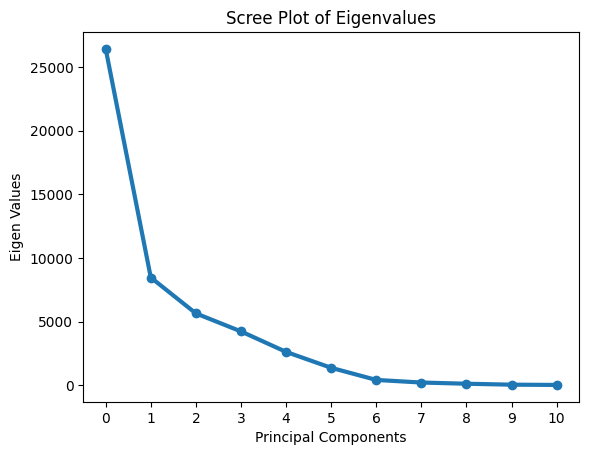

In [308]:
scree_evalues,moreevectors = calculate_PCA(cov_matrix,11)



plt.plot(scree_evalues,'o-',linewidth = 3)
plt.xlabel("Principal Components")
plt.ylabel("Eigen Values")
plt.title("Scree Plot of Eigenvalues")
plt.xticks(range(len(scree_evalues)))


Looking at the scree plot it seems that around 7 of the principal components are non-zero this tells us that that we need a minimum of 7 principal components to hold the integrity of the data and the number of princiapl components you need to show the menaingful variance in the data.

(1f)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)


ValueError: x and y must have same first dimension, but have shapes (0,) and (1,)

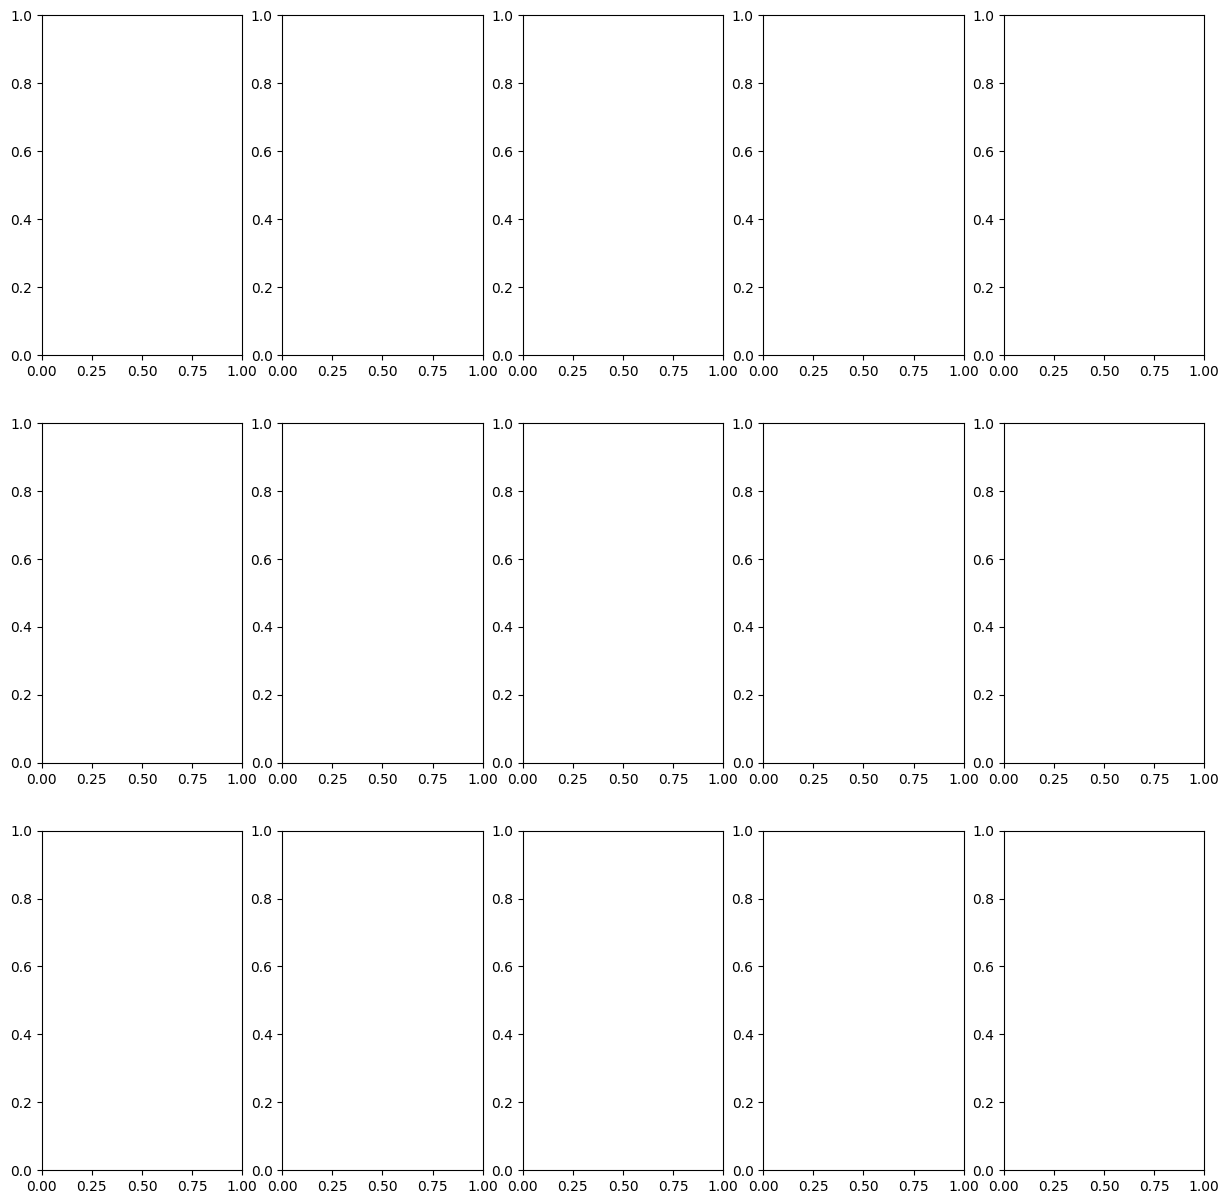

In [335]:
first_evalue = e_values[0]
first_evector = p_components[0]
second_evalue = e_values[1]
second_evector = p_components[1]
third_evalue = e_values[2]
third_evector = p_components[2]


#sqrt(first eigenvalue)



s_factors = [-3,-1.5,0,1.5,3.0]
first_hands = []
second_hands = []
third_hands = []

fig, axes = plt.subplots(3, 5, figsize= (15,15))
for col,s in enumerate(s_factors):
    hand1 = df_means+s*np.sqrt(first_evalue)*first_evector
    hand2 = df_means +s*np.sqrt(second_evalue)*second_evector
    hand3 = df_means+s*np.sqrt(third_evalue)*third_evector

    for index, value in enumerate(hand1):
        X1 = []
        Y1= []
        if (index %2 ==0):  
            X1.append(value)
        elif (index %2 ==1):
            Y1.append(value)      
    axes[0][col].plot(X1,Y1)


    for index, value in enumerate(hand2):
        X2 = []
        Y2= []
        if (index %2 ==0):  
            X2.append(value)
        elif (index %2 ==1):
            Y2.append(value)      
    axes[1][col].plot(X2,Y2)

    for index, value in enumerate(hand3):
        X3 = []
        Y3= []
        if (index %2 ==0):  
            X3.append(value)
        elif (index %2 ==1):
            Y3.append(value)      
    axes[2][col].plot(X3,Y3)






